In [189]:
## Importing The Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [190]:
# Reading The Data from csv file
media=pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [191]:
# Deleting The Column with Missing Data
media=media.drop(['Unnamed: 7'],axis=1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [192]:
media['Date']=pd.to_datetime(media['Date'])
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [193]:
#Reading The First Five Rows
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [194]:
# Reading The Last Five Rows
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
75,2017-05-15,313945,1808684,2226788,1398052759,1,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,0
79,2017-05-19,108961,1746735,2279036,1246026846,1,0


In [196]:
media.shape

(80, 7)

In [197]:
media.shape[0]

80

In [198]:
# Adding The Extra Column ,the number of days from 28th February,
media['day']=[x+1 for x in range(media.shape[0])]
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


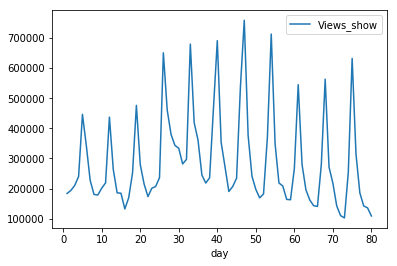

In [201]:
media.plot.line(x='day',y='Views_show')

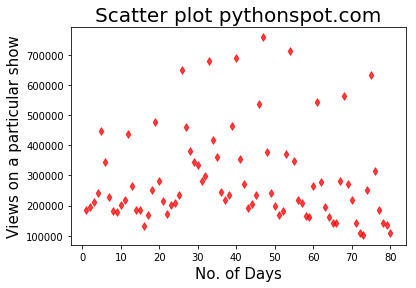

In [202]:
colors = "red"
area = np.pi*9
plt.scatter(media.day, media.Views_show,marker='d',s=area, c=colors, alpha=0.75)
plt.title('Scatter plot pythonspot.com',fontsize=20)
plt.xlabel('No. of Days',fontsize=15)
plt.ylabel('Views on a particular show',fontsize=15)
plt.show()

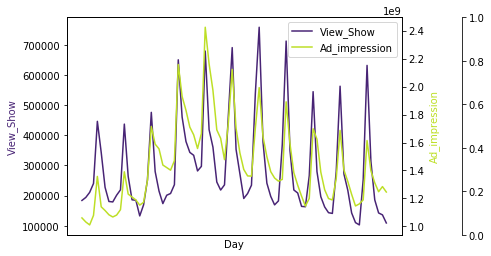

In [203]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(1,1,1)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0.1)
color2 = plt.cm.viridis(0.9)
color3 = plt.cm.viridis(0)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [204]:
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [205]:
X=media[['Visitors','weekday']]
Y=media['Views_show']
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,Y)
import statsmodels.api as sm
X=sm.add_constant(X)
lm1=sm.OLS(Y,X).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           8.01e-12
Time:                        00:34:51   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [206]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]
media['day'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [207]:
# Putting feature variable to X
X = media[['Visitors','weekend']]

# Putting response variable to y
y = media['Views_show']

In [208]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           2.51e-12
Time:                        00:34:52   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [209]:
X=media[['Visitors','weekend','Character_A']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm3=sm.OLS(Y,X).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.53e-14
Time:                        00:34:52   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [210]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


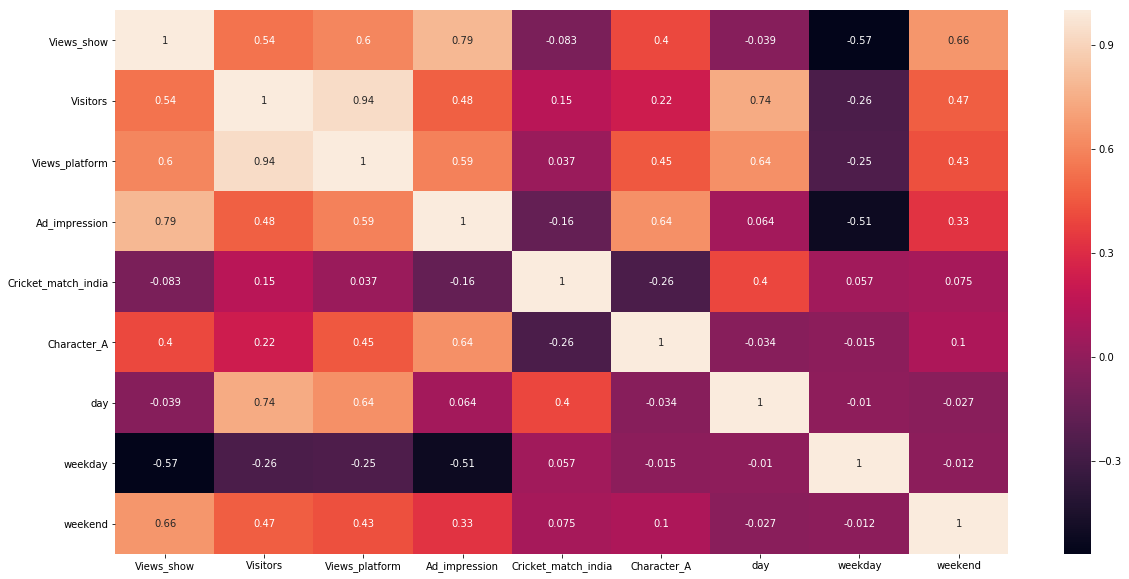

In [211]:
plt.figure(figsize=(20,10))
sns.heatmap(media.corr(),annot=True)

In [212]:
X=media[['weekend','Character_A','Ad_impression']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm4=sm.OLS(Y,X).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.05e-26
Time:                        00:34:53   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [213]:
X=media[['weekend','Character_A','Ad_impression','Views_platform']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm5=sm.OLS(Y,X).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     78.21
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           5.42e-26
Time:                        00:34:53   Log-Likelihood:                -1003.3
No. Observations:                  80   AIC:                             2017.
Df Residuals:                      75   BIC:                             2029.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.369e+05    7.4e+04     -4.

In [214]:
X=media[['weekend','Character_A','Visitors']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm6=sm.OLS(Y,X).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.53e-14
Time:                        00:34:53   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [215]:
X=media[['weekend','Character_A','Ad_impression','Visitors']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm7=sm.OLS(Y,X).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.10e-25
Time:                        00:34:53   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [216]:
X=media[['weekend','Character_A','Ad_impression']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm8=sm.OLS(Y,X).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.05e-26
Time:                        00:34:53   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [217]:
media['Ad_impression_millions']=media['Ad_impression']/1000000
X=media[['weekend','Character_A','Ad_impression_millions']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm9=sm.OLS(Y,X).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.05e-26
Time:                        00:34:53   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.66

In [218]:
X=media[['weekend','Character_A','Ad_impression_millions','Cricket_match_india']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm10=sm.OLS(Y,X).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.02e-25
Time:                        00:34:54   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.63

In [219]:
X=media[['weekend','Character_A','Ad_impression_millions']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
lm11=sm.OLS(Y,X).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.05e-26
Time:                        00:34:54   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.66

In [226]:
# Making predictions using the model
X = media[['weekend','Character_A','Ad_impression_millions']]
Y=media['Views_show']
X = sm.add_constant(X)
pred_views = lm11.predict(X)

In [228]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(Y,pred_views)
r_square=r2_score(Y,pred_views)
print(mse)
print(r_square)

4677651616.2534075
0.802643446857565


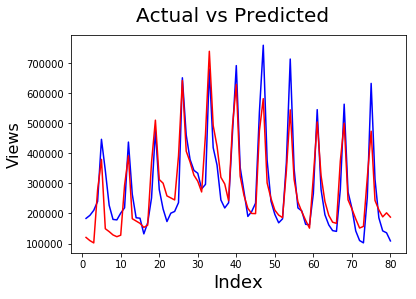

In [236]:
c=[i for i in range(1,81)]
fig=plt.figure()
plt.plot(c,Y,color='blue',linewidth=1.5,linestyle='-')
plt.plot(c,pred_views,color='red',linewidth=1.5,linestyle='-')
fig.suptitle('Actual vs Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views',fontsize=16)
plt.show()

Text(0, 0.5, 'Views_show-Predicted_views')

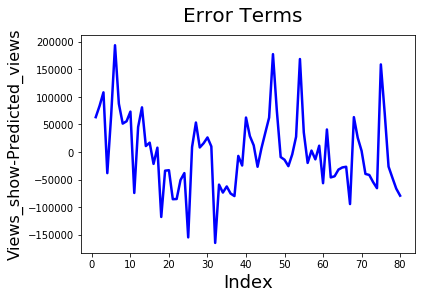

In [237]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

In [238]:
##Making Prediction using model 6
X=media[['weekend','Character_A','Visitors']]
Y=media['Views_show']
import statsmodels.api as sm
X=sm.add_constant(X)
pred_views2=lm6.predict(X)


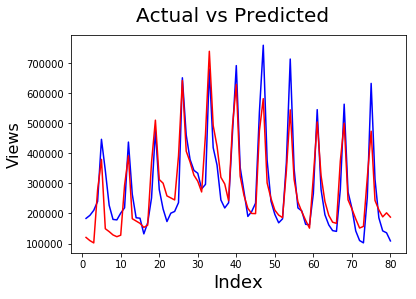

In [239]:
c=[i for i in range(1,81)]
fig=plt.figure()
plt.plot(c,Y,color='blue',linewidth=1.5,linestyle='-')
plt.plot(c,pred_views,color='red',linewidth=1.5,linestyle='-')
fig.suptitle('Actual vs Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views',fontsize=16)
plt.show()

Text(0, 0.5, 'Views_show-Predicted_views')

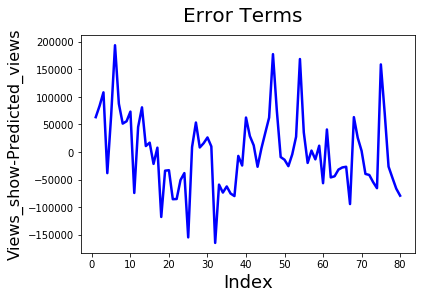

In [240]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label